# Métodos de Aprendizaje no supervisado

In [1]:
import pandas as pd

df = pd.read_excel('../../res/tp4/acath.xlsx', sheet_name='acath')  # 3505 rows

df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
0,0,73,132,268.0,1,1.0
1,0,68,85,120.0,1,1.0
2,0,54,45,NaN,1,0.0
3,1,58,86,245.0,0,0.0
4,1,56,7,269.0,0,0.0


In [2]:
negative = df[df.sigdz == 0]
positive = df[df.sigdz == 1]

print(f"Cantidad de filas negativas: {len(negative)}")
print(f"Cantidad de filas positivas: {len(positive)}")

# Se elige un subset de filas para igualar la proporción
positive = positive.sample(n=len(negative))

total = [negative, positive]
df = pd.concat(total)

Cantidad de filas negativas: 1170
Cantidad de filas positivas: 2334


In [3]:
df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
3,1,58,86,245.0,0,0.0
4,1,56,7,269.0,0,0.0
11,0,35,44,257.0,0,0.0
12,1,69,10,NaN,0,0.0
20,1,52,30,240.0,0,0.0


In [4]:
import numpy as np

# Sanitize dataset
result_column = 'sigdz'
columns = ['sex', 'age', 'cad.dur', 'choleste', 'tvdlm']
numeric_columns = ['age', 'cad.dur', 'choleste']

# Replace numeric value for `sigdz` with logical value
# df.replace({result_column: {1: 'T', 0: 'F'}}, inplace=True)
# df.replace({'tvdlm': {1: 'T', 0: 'F'}}, inplace=True)
# df.replace({'sex': {1: 'F', 0: 'M'}}, inplace=True)

# Replace NaN occurrences with mean
for column in numeric_columns:
    df.replace({column: {np.nan: int(df[column].mean())}}, inplace=True)

df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
3,1,58,86,245.0,0,0.0
4,1,56,7,269.0,0,0.0
11,0,35,44,257.0,0,0.0
12,1,69,10,227.0,0,0.0
20,1,52,30,240.0,0,0.0


## Regresión Logística

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

def train_model(data, fields, result_var, params=None):
    model = LogisticRegression()
    model.fit(data[fields], data[result_var])
    return model


model = train_model(train, numeric_columns, result_column)
print(f"sklearn Classes: {model.classes_}")
print(f"sklearn Coeficients: {model.coef_}")
print(f"sklearn Intercept b0: {model.intercept_}")

sklearn Classes: [0 1]
sklearn Coeficients: [[0.05547312 0.00031598 0.00705589]]
sklearn Intercept b0: [-4.4673289]


In [7]:
predicted = model.predict(test[numeric_columns])

Población completa


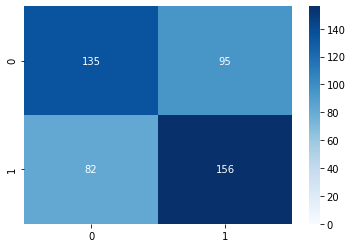

In [8]:
import seaborn as sns

def plot_confusion_matrix(data, result_var, predictions, title=None, ax=None):
    conf_mat = confusion_matrix(data[result_var], predictions)
    count_values = list(map(lambda x: sum(x), conf_mat))

    unique, counts = np.unique(np.array(data[result_var]), return_counts=True)
    count_labels = dict(zip(counts, unique))

    labels = []
    for value in count_values:
        labels.append(count_labels[value])

    if title is not None:
        print(title)

    if ax is None:
        sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, vmin=0)
    else:
        sns.heatmap(conf_mat, ax=ax, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, vmin=0)

plot_confusion_matrix(test, result_column, predicted, title='Población completa')

In [9]:
print(classification_report(test[result_column], predicted))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       230
           1       0.62      0.66      0.64       238

    accuracy                           0.62       468
   macro avg       0.62      0.62      0.62       468
weighted avg       0.62      0.62      0.62       468



#### Repetición del experimento usando librería statsmodels

In [10]:
import statsmodels.api as sm

def train_statsmodels_model(data, fields, result_var, params=None):
    model = sm.Logit(data[result_var], data[fields]).fit()
    print(model.summary())
    return model

statsmodel = train_statsmodels_model(train, numeric_columns, result_column)

Optimization terminated successfully.
         Current function value: 0.684935
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  sigdz   No. Observations:                 1872
Model:                          Logit   Df Residuals:                     1869
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                 0.01183
Time:                        15:07:21   Log-Likelihood:                -1282.2
converged:                       True   LL-Null:                       -1297.6
Covariance Type:            nonrobust   LLR p-value:                 2.142e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0163      0.004      4.274      0.000       0.009       0.024
cad.dur        0.0018      0.

In [11]:
yhat = statsmodel.predict(test[numeric_columns])
predicted_2 = list(map(round, yhat))
print('Actual values', list(test[result_column].values))
print('statsmodels Predictions :', predicted_2)

Actual values [0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0

statsmodels Población completa


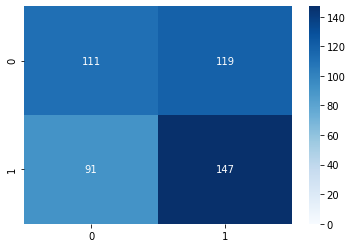

In [12]:
plot_confusion_matrix(test, result_column, predicted_2, title='statsmodels Población completa')

### Regresión Logística por género

In [13]:
men = df[df.sex == 0]
women = df[df.sex == 1]

train_men, test_men = train_test_split(men, test_size=0.2)
train_women, test_women = train_test_split(women, test_size=0.2)

print(f'Hombres: {len(men)}\nMujeres: {len(women)}')

Hombres: 1495
Mujeres: 845


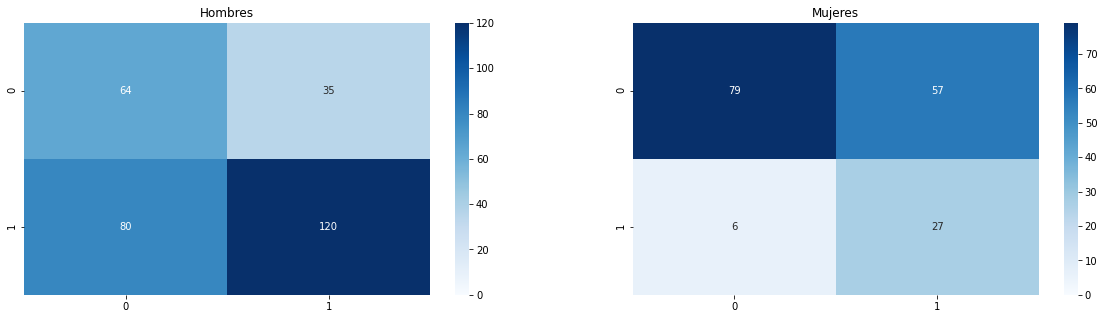

In [14]:
import matplotlib.pyplot as plt

model_men = train_model(train_men, numeric_columns, result_column)
model_women = train_model(train_women, numeric_columns, result_column)

predicted_men = model.predict(test_men[numeric_columns])
predicted_women = model.predict(test_women[numeric_columns])

tests = [test_men, test_women]
preds = [predicted_men, predicted_women]
titles = ['Hombres', 'Mujeres']

conf_mat_fig = plt.figure(figsize=(20,5))
i = 1
j = 2
k = 1
for test, pred, title in zip(tests, preds, titles):
    mat_ax = conf_mat_fig.add_subplot(i, j, k)
    mat_ax.set_title(title)
    plot_confusion_matrix(test, result_column, pred, ax=mat_ax)
    k += 1

In [15]:
for test, pred, title in zip(tests, preds, titles):
    print(title)
    print(classification_report(test[result_column], pred))

Hombres
              precision    recall  f1-score   support

           0       0.44      0.65      0.53        99
           1       0.77      0.60      0.68       200

    accuracy                           0.62       299
   macro avg       0.61      0.62      0.60       299
weighted avg       0.67      0.62      0.63       299

Mujeres
              precision    recall  f1-score   support

           0       0.93      0.58      0.71       136
           1       0.32      0.82      0.46        33

    accuracy                           0.63       169
   macro avg       0.63      0.70      0.59       169
weighted avg       0.81      0.63      0.67       169



#### Repetición del experimento con statsmodels

In [16]:
men = df[df.sex == 0]
women = df[df.sex == 1]

train_men, test_men = train_test_split(men, test_size=0.2)
train_women, test_women = train_test_split(women, test_size=0.2)
print(f'Hombres: {len(men)}\nMujeres: {len(women)}')

Hombres: 1495
Mujeres: 845


Optimization terminated successfully.
         Current function value: 0.621235
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  sigdz   No. Observations:                 1196
Model:                          Logit   Df Residuals:                     1193
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                 0.04528
Time:                        15:07:27   Log-Likelihood:                -743.00
converged:                       True   LL-Null:                       -778.23
Covariance Type:            nonrobust   LLR p-value:                 4.980e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0271      0.005      5.397      0.000       0.017       0.037
cad.dur        0.0039      0.

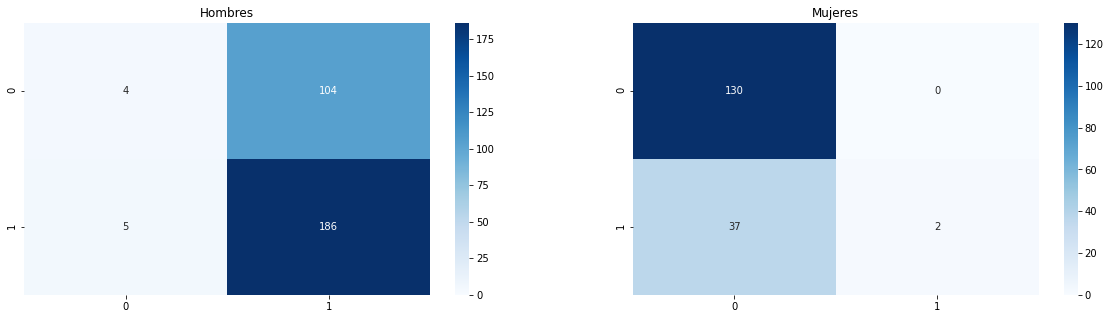

In [17]:
model_men_2 = train_statsmodels_model(train_men, numeric_columns, result_column)
model_women_2 = train_statsmodels_model(train_women, numeric_columns, result_column)

predicted_men = model.predict(test_men[numeric_columns])
predicted_women = model.predict(test_women[numeric_columns])

yhat_men = model_men_2.predict(test_men[numeric_columns])
predicted_men_2 = list(map(round, yhat_men))
yhat_women = model_women_2.predict(test_women[numeric_columns])
predicted_women_2 = list(map(round, yhat_women))

tests = [test_men, test_women]
preds = [predicted_men_2, predicted_women_2]
titles = ['Hombres', 'Mujeres']

conf_mat_fig = plt.figure(figsize=(20,5))
i = 1
j = 2
k = 1
for test, pred, title in zip(tests, preds, titles):
    mat_ax = conf_mat_fig.add_subplot(i, j, k)
    mat_ax.set_title(title)
    plot_confusion_matrix(test, result_column, pred, ax=mat_ax)
    k += 1

## Agrupamiento Jerárquico

In [18]:
train_hc, test_hc = train_test_split(df, test_size=0.05)

In [19]:
normalized_df = test_hc.copy()
for column in numeric_columns:
    column_min = min(normalized_df[column])
    column_max = max(normalized_df[column])
    #print(f"{column_min} {column_max}")
    normalized_df[column] = normalized_df[column].apply(lambda x: (x - column_min) / (column_max - column_min))

normalized_df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
1601,1,0.603175,0.352770,0.404494,1,0.0
2043,0,0.444444,0.075802,0.498127,1,1.0
1841,0,0.476190,0.055394,0.262172,0,0.0
234,1,0.777778,0.005831,0.445693,0,0.0
2712,0,0.634921,0.002915,0.445693,1,0.0


In [20]:
distance_matrix = np.zeros((len(normalized_df), len(normalized_df)))
num_norm_df = normalized_df[numeric_columns]
for i in range(len(normalized_df)):
    row_i = num_norm_df.iloc[i].to_numpy()
    for j in range(len(normalized_df)):
        if i >= j:
            continue
        row_j = num_norm_df.iloc[j].to_numpy()
        dist = np.linalg.norm(row_i - row_j)
        distance_matrix[i][j] = distance_matrix[j][i] = dist
    
    if i % 50 == 0:
        print(f"Processed {i} rows")

Processed 0 rows
Processed 50 rows
Processed 100 rows


In [21]:
print(distance_matrix)

[[0.         0.33267646 0.35328896 ... 0.57739571 0.8070317  0.17636006]
 [0.33267646 0.         0.23895416 ... 0.36266538 0.57874459 0.40585355]
 [0.35328896 0.23895416 0.         ... 0.59056543 0.8034157  0.33594344]
 ...
 [0.57739571 0.36266538 0.59056543 ... 0.         0.36712252 0.71288923]
 [0.8070317  0.57874459 0.8034157  ... 0.36712252 0.         0.90375733]
 [0.17636006 0.40585355 0.33594344 ... 0.71288923 0.90375733 0.        ]]


In [22]:
# [Nivel, Grupos]
# Grupos = [[p1, p2, p13], [p4], [p5, p9], ...] # array de sets

np.set_printoptions(linewidth=120)

def get_basic_distance_between_groups(group_1, group_2, operation):
    min_dist = None
    for point_1_index in group_1:
        for point_2_index in group_2:
            dist = distance_matrix[point_1_index][point_2_index]
            if min_dist is None or eval(f"{dist} {operation} {min_dist}"):
                min_dist = dist
    return min_dist

def get_average_distance_between_groups(group_1, group_2):
    suma = 0
    for point_1_index in group_1:
        for point_2_index in group_2:
            suma += distance_matrix[point_1_index][point_2_index]
    return suma / (len(group_1) * len(group_2))

def get_centroid_distance_between_groups(group_1_index, group_2_index, centroids):
    return np.linalg.norm(centroids[group_1_index]["centroid"] - centroids[group_2_index]["centroid"])
    
def get_distance_between_groups(groups, group_1_index, group_2_index, mode, centroids=None):
    group_1 = groups[group_1_index]
    group_2 = groups[group_2_index]
    if mode == "min":
        return get_basic_distance_between_groups(group_1, group_2, "<")
    elif mode == "max":
        return get_basic_distance_between_groups(group_1, group_2, ">")
    elif mode == "avg":
        return get_average_distance_between_groups(group_1, group_2)
    elif mode == "ctr":
        return get_centroid_distance_between_groups(group_1_index, group_2_index, centroids)
    
    raise Exception("Invalid distance mode")

def hierarchical_clustering(mode, cluster_count):
    levels = [[]]
    for i in range(len(normalized_df)):
        levels[0].append(set([i]))
    
    centroids = None # Array of centroid coordinates for each group
    if mode == "ctr":
        centroids = []
        for i in range(len(num_norm_df)):
            point = num_norm_df.iloc[i].to_numpy()
            centroids.append({"centroid": point, "points": np.array([point])})
    
    current_level = 0
    while len(levels[current_level]) > cluster_count:
        current_groups = levels[current_level]
        group_qty = len(levels[current_level])
        
        min_group_dist = None
        groups_to_merge = (None, None) # Indices
        
        for i in range(group_qty):
            for j in range(i + 1, group_qty):
                group_dist = get_distance_between_groups(current_groups, i, j, mode, centroids)
                if (min_group_dist is None) or (group_dist < min_group_dist):
                    groups_to_merge = (i, j)
                    min_group_dist = group_dist

        group_to_merge_1 = current_groups[groups_to_merge[0]]
        group_to_merge_2 = current_groups[groups_to_merge[1]]
        
        levels.append(current_groups.copy())
        new_group = set()
        new_group.update(group_to_merge_2)
        new_group.update(group_to_merge_1)
        levels[current_level + 1].append(new_group)
        levels[current_level + 1].pop(max(groups_to_merge))
        levels[current_level + 1].pop(min(groups_to_merge))
        
        if centroids is not None: # Push new group's centroid based on previous 2 centroids
            centroid_dict_1 = centroids.pop(max(groups_to_merge))
            centroid_dict_2 = centroids.pop(min(groups_to_merge))
            merged_points = np.concatenate((centroid_dict_1["points"], centroid_dict_2["points"]), axis=0)
            new_centroid_dict = {"centroid": merged_points.mean(axis=0), "points": merged_points}
            centroids.append(new_centroid_dict)

        current_level += 1
        
        if current_level % 25 == 0:
            print(f"Clusters merged: {current_level} - Distance between merged clusters was {min_group_dist}")
        
    return levels

In [23]:
from scipy import stats

def classify_clusters(clusters):
    if len(clusters) != 2:
        raise Exception("Invalid argument")
        
    cluster_1_rows = np.array(list(map(lambda x: test_hc[result_column].iloc[x], clusters[0])))
    cluster_1_mode = stats.mode(cluster_1_rows)[0][0]
    cluster_2_rows = np.array(list(map(lambda x: test_hc[result_column].iloc[x], clusters[1])))
    cluster_2_mode = stats.mode(cluster_2_rows)[0][0]
    
    return (cluster_1_mode, cluster_2_mode)

### Utilizando la Mínima como medida de similitud entre grupos

In [24]:
clusters_min_dist = hierarchical_clustering("min", 2)

Clusters merged: 25 - Distance between merged clusters was 0.03617661982998568
Clusters merged: 50 - Distance between merged clusters was 0.05201083625718352
Clusters merged: 75 - Distance between merged clusters was 0.07313831479041714
Clusters merged: 100 - Distance between merged clusters was 0.1387786183520795


In [25]:
print(clusters_min_dist[-1])

[{17}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116}]


In [26]:
min_cluster_classes = classify_clusters(clusters_min_dist[-1])

<AxesSubplot:>

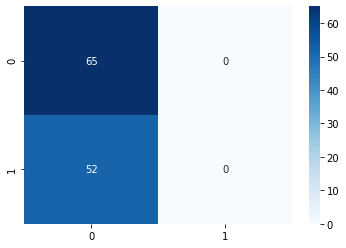

In [27]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for clase, cluster in zip(min_cluster_classes, clusters_min_dist[-1]):
    for index in cluster:
        real_class = normalized_df[result_column].iloc[index]
        confusion_matrix[real_class][clase] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)

### Utilizando la Máxima como medida de similitud entre grupos

In [28]:
clusters_max_dist = hierarchical_clustering("max", 2)

Clusters merged: 25 - Distance between merged clusters was 0.04512530954630738
Clusters merged: 50 - Distance between merged clusters was 0.06861463915506993
Clusters merged: 75 - Distance between merged clusters was 0.14230961344714055
Clusters merged: 100 - Distance between merged clusters was 0.3204821461933109


In [29]:
print(clusters_max_dist[-1])

[{97, 104, 43, 13, 17, 81, 49, 116, 55, 89, 59, 28, 94, 95}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 96, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115}]


In [30]:
max_cluster_classes = classify_clusters(clusters_max_dist[-1])

<AxesSubplot:>

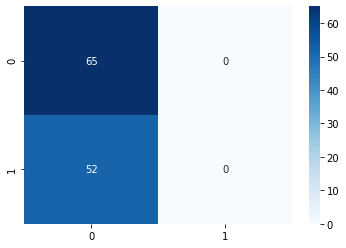

In [31]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for clase, cluster in zip(max_cluster_classes, clusters_max_dist[-1]):
    for index in cluster:
        real_class = normalized_df[result_column].iloc[index]
        confusion_matrix[real_class][clase] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)

### Utilizando el Promedio como medida de similitud entre grupos

In [32]:
clusters_avg_dist = hierarchical_clustering("avg", 2)

Clusters merged: 25 - Distance between merged clusters was 0.03850775315810327
Clusters merged: 50 - Distance between merged clusters was 0.06587290491686404
Clusters merged: 75 - Distance between merged clusters was 0.11757936527529615
Clusters merged: 100 - Distance between merged clusters was 0.24178124095603257


In [33]:
print(clusters_avg_dist[-1])

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116}, {17, 55}]


In [34]:
avg_cluster_classes = classify_clusters(clusters_avg_dist[-1])

<AxesSubplot:>

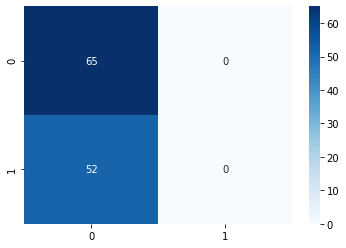

In [35]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for clase, cluster in zip(avg_cluster_classes, clusters_avg_dist[-1]):
    for index in cluster:
        real_class = normalized_df[result_column].iloc[index]
        confusion_matrix[real_class][clase] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)

### Utilizando el Centroide como medida de similitud entre grupos

In [36]:
clusters_ctr_dist = hierarchical_clustering("ctr", 2)

Clusters merged: 25 - Distance between merged clusters was 0.037970320460562645
Clusters merged: 50 - Distance between merged clusters was 0.06549564961447368
Clusters merged: 75 - Distance between merged clusters was 0.10227075081583427
Clusters merged: 100 - Distance between merged clusters was 0.22188229089693556


In [37]:
print(clusters_ctr_dist[-1])

[{115}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116}]


In [38]:
ctr_cluster_classes = classify_clusters(clusters_ctr_dist[-1])

<AxesSubplot:>

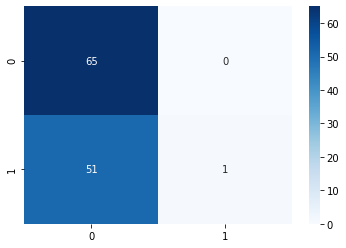

In [39]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for clase, cluster in zip(ctr_cluster_classes, clusters_ctr_dist[-1]):
    for index in cluster:
        real_class = normalized_df[result_column].iloc[index]
        confusion_matrix[real_class][clase] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)

## K-medias

In [40]:
rng = np.random.default_rng()

# Update centroids based on points in the cluster
def update_centroids(data, classes):
    for clase in classes.values():
        if clase["changed"]:
            clase["centroid"] = np.array(list(map(lambda x: data.iloc[x], clase["indices"]))).mean(axis=0)
            clase["changed"] = False

def K_means(data, K=2):
    classes = {i: {"indices": set(), "centroid": np.zeros(len(numeric_columns)), "changed": True} for i in range(1, K+1)}
    
    # Set random clusters for every data point
    random_classes = rng.integers(1, K+1, size=len(data))
    for index, point_class in enumerate(random_classes):
        classes[point_class]["indices"].add(index)
    
    # Iterate until no changes are made in cluster
    while any(map(lambda x: x["changed"], classes.values())):
        update_centroids(data, classes)

        changes = []
        for clase, clase_value in classes.items():
            for point_index in clase_value["indices"]:
                point = data.iloc[point_index]
                
                # Get closest cluster based on distance to cluster centroids
                closest_class = (clase, np.linalg.norm(point - clase_value["centroid"]))
                for other_class, other_class_value in classes.items():
                    if clase == other_class:
                        continue

                    other_centroid = other_class_value["centroid"]
                    other_centroid_dist = np.linalg.norm(point - other_centroid)

                    if other_centroid_dist < closest_class[1]:
                        closest_class = (other_class, other_centroid_dist)

                if closest_class[0] != clase:
                    # Record belongs to another cluster, save for later update
                    changes.append({"old_cluster": clase, "new_cluster": closest_class[0], "point_index": point_index})

        # Update clusters
        for change in changes:
            old_cluster = classes[change["old_cluster"]]
            new_cluster = classes[change["new_cluster"]]
            old_cluster["indices"].remove(change["point_index"])
            new_cluster["indices"].add(change["point_index"])
            old_cluster["changed"] = new_cluster["changed"] = True
            
        print(f"Cluster changes processed: {len(changes)}")

    return classes

def classify_K_means(data, clusters):
    modes = []
    for cluster in clusters.values():
        cluster_rows = np.array(list(map(lambda x: data[result_column].iloc[x], cluster["indices"])))
        cluster_mode = stats.mode(cluster_rows)[0][0]
        modes.append(cluster_mode)
        
    return modes

def get_W(data, cluster):
    W = 0
    cluster_indices = list(cluster["indices"])
    for i in range(len(cluster_indices)):
        point_1 = data.iloc[cluster_indices[i]]
        for j in range(i+1, len(cluster_indices)):
            point_2 = data.iloc[cluster_indices[j]]
            W += sum(map(lambda x: (x[0] - x[1])**2, zip(point_1, point_2)))
    return W / len(cluster_indices)

def K_means_best(data, iterations=5, K=2):
    min_W_sum = None
    for i in range(iterations):
        sample, _ = train_test_split(data, test_size=0.3)
        K_means_clusters = K_means(sample, K)
        W_sum = 0
        
        # Calculate the sum of W of each cluster
        for current_K in range(1, K+1):
            W_sum += get_W(sample, K_means_clusters[current_K])
        
        # Get the best clusters based on minimum W sum
        if min_W_sum is None or W_sum < min_W_sum[1]:
            min_W_sum = (K_means_clusters, W_sum, sample)
            
        print(f"Finished iteration {i+1} - W sum: {W_sum}")
            
    return min_W_sum

def classify_K_means_best(data, sample, clusters):
    modes = []
    for cluster in clusters.values():
        # sample:
        # index | cad.dur   | age | ...
        # 1774  | 0.6       | 0.6 | ...
        # 3297  | 0.4       | 0.5 | ...
        #
        # data:
        # index | sex | cad.dur | ... | sigdz
        # 1774  | 1   | 0.6     | ... | 0
        # 3297  | 0.4 | 0.5    | ...  | 1
        #
        # Based on index in sample (1774), look for result column (sigdz) in entire data set - subsample does not have column sigdz and has less rows
        cluster_rows = np.array(list(map(lambda x: data[result_column].loc[sample.index[x]], cluster["indices"])))
        cluster_mode = stats.mode(cluster_rows)[0][0]
        modes.append(cluster_mode)
        
    return modes

In [41]:
# Use balanced dataset, without dividing into training and testing
complete_normalized_df = df.copy()
for column in numeric_columns:
    column_min = min(complete_normalized_df[column])
    column_max = max(complete_normalized_df[column])
    complete_normalized_df[column] = complete_normalized_df[column].apply(lambda x: (x - column_min) / (column_max - column_min))

complete_numeric_norm_df = complete_normalized_df[numeric_columns]

In [42]:
complete_normalized_df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
3,1,0.630769,0.231183,0.458599,0,0.0
4,1,0.600000,0.018817,0.509554,0,0.0
11,0,0.276923,0.118280,0.484076,0,0.0
12,1,0.800000,0.026882,0.420382,0,0.0
20,1,0.538462,0.080645,0.447983,0,0.0


In [43]:
complete_normalized_df.iloc[3]

sex         1.000000
age         0.800000
cad.dur     0.026882
choleste    0.420382
sigdz       0.000000
tvdlm       0.000000
Name: 12, dtype: float64

In [44]:
K_means_clusters = K_means(complete_numeric_norm_df, 2)

Cluster changes processed: 1146
Cluster changes processed: 171
Cluster changes processed: 63
Cluster changes processed: 31
Cluster changes processed: 24
Cluster changes processed: 16
Cluster changes processed: 14
Cluster changes processed: 17
Cluster changes processed: 11
Cluster changes processed: 9
Cluster changes processed: 2
Cluster changes processed: 2
Cluster changes processed: 1
Cluster changes processed: 0


In [45]:
classify_K_means(complete_normalized_df, K_means_clusters)

[0, 1]

In [46]:
get_W(complete_numeric_norm_df, K_means_clusters[1])

32.539377603806074

In [47]:
get_W(complete_numeric_norm_df, K_means_clusters[2])

51.81816465698864

Run K-means algorithm multiple times and keep the data that gives the minimum W(C_k) sum

In [ ]:
K_means_best_clusters, min_W_sum, K_means_best_sample = K_means_best(complete_numeric_norm_df, 5, 2)

In [ ]:
K_means_best_classes = classify_K_means_best(complete_normalized_df, K_means_best_sample, K_means_best_clusters)

In [ ]:
K_means_best_classes

In [ ]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for clase, cluster in zip(K_means_best_classes, K_means_best_clusters.values()):
    for index in cluster["indices"]:
        real_class = complete_normalized_df[result_column].loc[K_means_best_sample.index[index]]
        confusion_matrix[real_class][clase] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)

### Redes de Kohonen

In [61]:
import numpy as np
import math

## Algortimo

# Inicializar los pesos
# Inicializar el radio de vecindad
# Inicializar el factor de aprendizaje 
# Inicializar epocas en 0
#
# 
### Mientras epocas < max ctd epocas
######## Para cada ejemplo tomado al azar del conjunto de entrenamiento
#         Presentar el ejemplo en la capa de entrada
#         Obtener la neurona ganadora
#         Actualizar los pesos de las conexiones de la neurona ganadora
#         Actualizar los pesos de las conexiones de las neuronas vecinas
#     Incrementar epocas
#     Actualizar el radio de vecindad
#     Actualizar el factor de aprendizaje
# Fin

# Valores Iniciales
# Los pesos se inicializan con valores aleatorios con U(-1, 1)
# R = k
# n = 0,1

# w es un vector con los pesos de cada neurona de salida
# xp es un ejemplo del conjunto de entrenamiento
# dim(xp) = dim(w)


In [81]:
def update_R(epoch, max_epochs, initial_R):
    return (max_epochs - epoch) * initial_R / max_epochs

# Usamos la distancia euclidea como medida de similitud para saber cual es la neurona ganadora
def euclidean_distance(w, xp):
    return np.linalg.norm(w - xp)

# Actualizacion de los pesos para la neurona ganadora para el ejemplo de entrenamiento
def update_w_winning_neuron(w, n, xp):
    delta_w = n * (xp - w)
    return w + delta_w

# Actualizacion de pesos para una neurona que esta en el vecindario de la neurona ganadora
def update_w_neighbour(w, n, xp, d, R):
    V = math.exp(-2 * d / R)
    delta_w = V * n * (xp - w)
    return w + delta_w
    
def update_learning_factor(epoch, max_epochs):
    return 0.1 * (1 - (epoch / max_epochs))

def update_neighbours(matrix, coords, R, k, n, xp):
    for i in range(k):
        for j in range(k):
            dist = np.linalg.norm(np.array([i, j]) - np.array([coords[0], coords[1]]))
            if (dist <= R):
                V = math.exp(-2 * dist / R)
                delta_w = V * n * (xp - matrix[i][j])
                matrix[i][j] += delta_w
    
            
            
def get_winning_neuron(matrix, xp, k):
    min_dist = None
    min_coords = None
    for i in range(k):
        for j in range(k):
            dist = euclidean_distance(matrix[i][j], xp)
            if min_dist is None or dist < min_dist:
                min_dist = dist
                min_coords = (i, j)
    return min_coords

In [85]:
# Crear una matriz de [K x K] para la capa de salida
# en cada posicion i,j hay un vector w con n pesos (dim de la cantidad de atributos
# de un ejemplo del dataset)

def train_kohonen(data, k=20, max_epochs=500):
    R = k
    epoch = 0
    n = 0.1
    # Inicializar los pesos con ~ U(-1, 1)
    matrix = [[rng.uniform(1, -1, len(numeric_columns)) for x in range(k)] for y in range(k)]
    
    while epoch < max_epochs:
        
        for index, row in data.iterrows():
            xp = row.to_numpy()
            coords = get_winning_neuron(matrix, xp, k)
            winning_w = matrix[coords[0]][coords[1]]
            matrix[coords[0]][coords[1]] = update_w_winning_neuron(winning_w, n, xp)
            update_neighbours(matrix, coords, R, k, n, xp)
        
        epoch += 1
        R = update_R(epoch, max_epochs, k)
        n = update_learning_factor(epoch, max_epochs)
        print(epoch)
        
    return matrix

In [86]:
def create_count_matrix(data, matrix):
    k = len(matrix)
    count_matrix = [[[0, 0] for x in range(k)] for y in range(k)]
    for index, row in data.iterrows():
        xp = row[numeric_columns].to_numpy()
        coords = get_winning_neuron(matrix, xp, k)
        count_matrix[coords[0]][coords[1]][int(row[result_column])] += 1
        
    return count_matrix
    
    
def classify_kohonen(data, matrix):
    k = len(matrix)
    class_matrix = [[None for x in range(k)] for y in range(k)]
    count_matrix = create_count_matrix(data, matrix)
    for i in range(k):
        for j in range(k):
            if count_matrix[i][j][0] == 0 and count_matrix[i][j][1] == 0:
                class_matrix[i][j] = None
            elif count_matrix[i][j][0] >= count_matrix[i][j][1]:
                class_matrix[i][j] = 0
            else: 
                 class_matrix[i][j] = 1
    
    return class_matrix
            

In [ ]:
ranged_df = df.copy()
for column in numeric_columns:
    mean = ranged_df[column].mean()
    std = ranged_df[column].std()
    ranged_df[column] = ranged_df[column].apply(lambda x: (x - mean) / std)

train_kohonen_df, test_kohonen_df = train_test_split(ranged_df, test_size=0.2)

kohonen_matrix = train_kohonen(train_kohonen_df[numeric_columns], k=4, max_epochs=500)

tagged_neurons = classify_kohonen(train_kohonen_df, kohonen_matrix)

print(tagged_neurons)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


<AxesSubplot:>

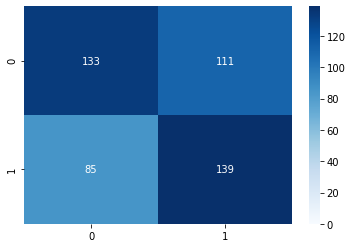

In [92]:
# Armado de matriz de confusión (filas: valores reales; columnas: valores predictivos)
confusion_matrix = { 0: {}, 1: {} }
columns = []
for key in confusion_matrix.keys():
    columns.append(key)
    confusion_matrix[key] = { 0: 0, 1: 0 }

for index, row in test_kohonen_df.iterrows():
    
    real_class = row[result_column]
    coords = get_winning_neuron(kohonen_matrix, row[numeric_columns].to_numpy(), len(kohonen_matrix))
    predicted_class = tagged_neurons[coords[0]][coords[1]]
    confusion_matrix[real_class][predicted_class] += 1

confusion_df = { key : list(confusion_matrix[key].values()) for key in confusion_matrix.keys() }
confusion_df = pd.DataFrame.from_dict(confusion_df, orient='index', columns=columns)

sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g', vmin=0)